In [4]:
import dataclasses
import logging
import math
import os
import io
import sys
import time
import json
import random
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig, DebertaV2ForSequenceClassification
import torch
from tqdm import tqdm

In [6]:
reward_name = "/home/tiger/.cache/huggingface/hub/models--OpenAssistant--reward-model-deberta-v3-large-v2/snapshots/c355404efa9ad2ad069f3a197cae0523c14244fc"
model: DebertaV2ForSequenceClassification = AutoModelForSequenceClassification.from_pretrained(reward_name)
print(model)
print(type(model))

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 1024, padding_idx=0)
      (LayerNorm): LayerNorm((1024,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-23): 24 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (key_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (value_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-07, element

In [ ]:
model.forward()

In [2]:
with open("/opt/tiger/MoDS/quality-evaluation/input.json", "r") as f:
    data = f.read()
    data = json.loads(data)
print(len(data))

52002


In [3]:
data = json.dumps(data[:1000])
with open("/opt/tiger/MoDS/quality-evaluation/data.json", "w") as f:
    f.write(data)

In [2]:
from vllm import LLM

In [6]:
model = LLM(model="gpt2", tensor_parallel_size=6, dtype="float16")
print(model)

/home/tiger/.local/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2024-05-26 17:30:16,005	INFO worker.py:1582 -- Calling ray.init() again after it has already been called.


In [1]:
from datasets import load_dataset

dataset = load_dataset("TIGER-Lab/MathInstruct", cache_dir="/mnt/bn/data-tns-live-llm/leon/datasets/")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [2]:
import polars as pl
df = pl.read_parquet("/opt/tiger/MoDS/code.parquet")

In [5]:
print(df.head())

shape: (5, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ instruction                      ‚îÜ input                       ‚îÜ output                          ‚îÇ
‚îÇ ---                              ‚îÜ ---                         ‚îÜ ---                             ‚îÇ
‚îÇ str                              ‚îÜ str                         ‚îÜ str                             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Create a function that takes a‚Ä¶  ‚îÜ               

In [6]:
data = pl.read_json("/opt/tiger/MoDS/MathInstruct.json")
print(data.head())

shape: (5, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ source                         ‚îÜ instruction                    ‚îÜ output                         ‚îÇ
‚îÇ ---                            ‚îÜ ---                            ‚îÜ ---                            ‚îÇ
‚îÇ str                            ‚îÜ str                            ‚îÜ str                            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ data/CoT/aqua_rat.json         ‚îÜ The distance betwe

In [8]:
import torch
t1 = torch.load("/opt/tiger/Cherry_LLM/code_data_pre.pt")
print(type(t1))

<class 'list'>


In [9]:
print(t1[0])

{'ppl': [tensor(18.6185), 0, 0], 'sent_emb': [tensor([[-0.3425,  0.0562,  0.7246,  ..., -0.0523, -0.9365, -1.1855]],
       dtype=torch.float16), 0, 0]}


In [1]:
from datasets import load_dataset
dataset = load_dataset("parquet", data_files = "/mnt/bn/data-tns-live-llm/leon/datasets/code.parquet", split = "train")

In [4]:
print(dataset[0])

{'instruction': 'Create a function that takes a specific input and produces a specific output using any mathematical operators. Write corresponding code in Python.', 'input': '', 'output': 'def f(x):\n    """\n    Takes a specific input and produces a specific output using any mathematical operators\n    """\n    return x**2 + 3*x'}


In [6]:
PROMPT_DICT = {
    "prompt_input": (
        "Below is an instruction that describes a task, paired with an input that provides further context. "
        "Write a response that appropriately completes the request.\n\n"
        "### Instruction:\n{instruction}\n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_no_input": (
        "Below is an instruction that describes a task. "
        "Write a response that appropriately completes the request.\n\n"
        "### Instruction:\n{instruction}\n\n### Response:"
    ),
}

In [7]:
def format_function(input):
    prompt_input, prompt_no_input = PROMPT_DICT["prompt_input"], PROMPT_DICT["prompt_no_input"]
    sources = prompt_input.format_map(input) if input.get("input", "") != "" else prompt_no_input.format_map(input)
    return sources

In [8]:
print(format_function(dataset[0]))

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a function that takes a specific input and produces a specific output using any mathematical operators. Write corresponding code in Python.

### Response:


In [5]:
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("/mnt/bn/data-tns-live-llm/leon/datasets/pre-exp-code/")
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50258, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50258, bias=False)
)


In [40]:
import torch
data = torch.load("/mnt/bn/data-tns-live-llm/leon/datasets/math_data_cherry.pt")
ifd = [d["ppl"][2]/d["ppl"][1] for d in data]
idxs = sorted(range(len(ifd)), key=lambda i: ifd[i], reverse=True)
# print(idxs[:1000])

In [41]:
tmp = [ifd[idx] for idx in idxs[:1010]]
print((tmp))

[tensor(1.3115, dtype=torch.float16), tensor(1.2227, dtype=torch.float16), tensor(1.0791, dtype=torch.float16), tensor(1.0566, dtype=torch.float16), tensor(0.9985, dtype=torch.float16), tensor(0.9858, dtype=torch.float16), tensor(0.9751, dtype=torch.float16), tensor(0.9741, dtype=torch.float16), tensor(0.9697, dtype=torch.float16), tensor(0.9673, dtype=torch.float16), tensor(0.9673, dtype=torch.float16), tensor(0.9658, dtype=torch.float16), tensor(0.9570, dtype=torch.float16), tensor(0.9565, dtype=torch.float16), tensor(0.9556, dtype=torch.float16), tensor(0.9541, dtype=torch.float16), tensor(0.9443, dtype=torch.float16), tensor(0.9419, dtype=torch.float16), tensor(0.9404, dtype=torch.float16), tensor(0.9395, dtype=torch.float16), tensor(0.9390, dtype=torch.float16), tensor(0.9355, dtype=torch.float16), tensor(0.9346, dtype=torch.float16), tensor(0.9336, dtype=torch.float16), tensor(0.9321, dtype=torch.float16), tensor(0.9321, dtype=torch.float16), tensor(0.9292, dtype=torch.float16), 

In [42]:
idxs = idxs[4:]
print(idxs[:100])

[1146, 6228, 1437, 2399, 4983, 5573, 6456, 6614, 774, 4953, 5213, 5117, 3439, 1820, 664, 5604, 1940, 6951, 5688, 6945, 1562, 1658, 2625, 5097, 2049, 2225, 1422, 5623, 6860, 2833, 5649, 30, 2189, 49, 56, 7092, 1513, 5062, 752, 1991, 6371, 6330, 5187, 745, 6512, 2503, 5079, 1964, 2338, 5119, 5228, 5130, 58, 6838, 2178, 2074, 1233, 5603, 5848, 6794, 1916, 2736, 1475, 2236, 2686, 5018, 1316, 1169, 2708, 818, 1151, 1267, 6888, 2030, 5298, 5596, 2777, 6919, 853, 5223, 5729, 1957, 5407, 5480, 5544, 5452, 5629, 4891, 1853, 5303, 1780, 5382, 1066, 1587, 2347, 1615, 5309, 4880, 5888, 1560]


In [43]:
torch.save(idxs[:1000], "/mnt/bn/data-tns-live-llm/leon/datasets/cherry_1000.pt")

In [33]:
import json
with open("/mnt/bn/data-tns-live-llm/leon/datasets/math-quality-evaluation.json", "r") as f:
    d1 = json.loads(f.read())
scores = [d["reward_score"] for d in d1[:10000]]
sidxs = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
print(sidxs[:1000])

[6748, 4298, 7832, 6275, 6233, 2809, 320, 4761, 3863, 6481, 6111, 5443, 4361, 265, 6595, 518, 2332, 789, 9375, 5388, 6901, 438, 4243, 8377, 4676, 37, 4823, 6239, 2571, 6382, 4015, 8456, 602, 3459, 5842, 6016, 7899, 6944, 5469, 9133, 6807, 3579, 5580, 8894, 9834, 2845, 8003, 9373, 8580, 6232, 8774, 2746, 9639, 32, 466, 5735, 6277, 9477, 6032, 5903, 6231, 7173, 3753, 6169, 9137, 5028, 370, 3018, 5758, 3757, 3424, 1821, 4572, 3225, 4364, 3287, 6229, 1108, 1606, 5174, 3420, 9296, 8533, 6638, 5809, 5659, 9805, 3211, 8707, 9386, 1443, 2199, 7985, 1747, 2367, 9033, 1781, 9589, 2214, 1798, 1914, 9361, 1489, 897, 2298, 4223, 235, 8545, 1572, 9519, 4238, 2131, 993, 8879, 1197, 5576, 8996, 2730, 471, 4083, 3413, 4524, 6882, 6029, 9584, 6209, 2490, 8644, 9390, 5849, 8565, 4396, 5512, 1125, 2059, 4005, 4654, 9417, 1446, 3373, 2520, 6173, 7302, 1439, 6532, 843, 2206, 6615, 200, 8888, 6940, 8166, 7215, 2961, 5307, 6832, 1602, 1502, 697, 2174, 1662, 1133, 9025, 9402, 5931, 8421, 354, 481, 7124, 1772, 

In [34]:
torch.save(sidxs[:1000], "/mnt/bn/data-tns-live-llm/leon/datasets/MoDS_1000.pt")

In [16]:
print(scores[413])

8.421875


In [45]:
with open("/mnt/bn/data-tns-live-llm/leon/datasets/MathInstruct.json", "r") as f:
    data = json.loads(f.read())

print(len(data))

262039


In [46]:
d1 = [data[idx] for idx in idxs[:1000]]
d2 = [data[idx] for idx in sidxs[:1000]]
print(d1[:100])
print(d2[:100])

[{'source': 'data/CoT/MATH_train.json', 'instruction': 'Compute\n\n$3(1+3(1+3(1+3(1+3(1+3(1+3(1+3(1+3(1+3)))))))))$', 'output': 'Not to be tricked by the excess of parentheses, we rewrite the expression as a geometric series: \\[3+3^2+3^3+\\cdots +3^9 +3^{10}.\\]Now the sum can be computed as $\\frac{3^{11}-3}{3-1}=\\boxed{88572}.$. The answer is 88572'}, {'source': 'data/CoT/aqua_rat.json', 'instruction': 'An gun can take a maximum of four shotsat an enemyplane moving away from it. The probability of hitting the plane at the 1st, 2nd, third and 4th shots are 1.4, 1.3, 1.2 & 1.1 respectively. What is the probability that the plane is hit when all the four shots are fired?\nAnswer Choices: (A) 0.6976 (B) 0.7893 (C) 0.8212 (D) 0.7541 (E) 0.9847', 'output': "Let's reason about the multi-choice question.\nRequired probability:\n=(0.4√ó0.7√ó0.8√ó0.9)+(0.6√ó0.3√ó0.8√ó0.9)+(0.6√ó0.7√ó0.2√ó0.9)+(0.6√ó0.7√ó0.8√ó0.1)+(0.4√ó0.3√ó0.8√ó0.9)+(0.4√ó0.7√ó0.2√ó0.9)+(0.4√ó0.7√ó0.8√ó0.1)+(0.6√ó0.3√ó0.2√ó

In [47]:
with open("/mnt/bn/data-tns-live-llm/leon/datasets/cherry_math.json", "w") as f:
    f.write(json.dumps(d1))

with open("/mnt/bn/data-tns-live-llm/leon/datasets/MoDS_math.json", "w") as f:
    f.write(json.dumps(d2))

In [1]:
import json
with open("/mnt/bn/data-tns-live-llm/leon/datasets/cherry_math.json", "r") as f:
    tmp = json.loads(f.read())[:100]
with open("/mnt/bn/data-tns-live-llm/leon/datasets/tmp.json", "w") as f:
    f.write(json.dumps(tmp))

In [58]:
from transformers import AutoModelForCausalLM, LlamaForCausalLM, AutoTokenizer
from peft import PeftModel
model: LlamaForCausalLM = AutoModelForCausalLM.from_pretrained("/mnt/bn/data-tns-live-llm/leon/datasets/pre-exp-math/", torch_dtype=torch.float16, output_hidden_states=True).to("cuda:0")
tokenizer = AutoTokenizer.from_pretrained("/mnt/bn/data-tns-live-llm/leon/datasets/pre-exp-math/")

In [48]:
d = idxs[:1000]+sidxs[:1000]
print(len(d))

2000


In [49]:
json_set = {t for t in d}
print(len(json_set))

1922


In [52]:
print(json_set)

{6, 7, 9, 10, 15, 18, 21, 26, 30, 32, 34, 37, 41, 49, 8244, 53, 54, 56, 8248, 58, 59, 61, 62, 67, 71, 72, 74, 8266, 76, 8268, 78, 77, 80, 8281, 95, 8289, 8311, 126, 131, 138, 141, 8336, 154, 8346, 157, 158, 8377, 186, 188, 200, 204, 205, 222, 8421, 8423, 8424, 235, 236, 8429, 8427, 8434, 8445, 254, 8456, 265, 8461, 8462, 288, 8484, 307, 8501, 320, 8517, 332, 8525, 8524, 334, 8526, 8533, 350, 8545, 354, 8552, 8554, 370, 8565, 386, 8580, 8581, 8582, 8589, 8602, 415, 8610, 419, 8624, 437, 438, 442, 445, 8640, 8644, 8649, 466, 8662, 471, 481, 488, 491, 493, 511, 8707, 518, 522, 529, 8724, 546, 8741, 8747, 8750, 560, 571, 8774, 592, 593, 8784, 598, 8791, 8792, 602, 8794, 8798, 8799, 8806, 621, 622, 8819, 629, 8829, 640, 646, 654, 664, 8863, 8874, 8875, 8879, 688, 690, 693, 8886, 8888, 697, 8893, 8894, 706, 723, 724, 8916, 725, 728, 730, 731, 735, 736, 739, 741, 742, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 8938, 755, 757, 758, 8952, 764, 767, 768, 8959, 771, 773, 774, 775, 784, 786

In [50]:
cnt = 0
for idx in idxs[:1000]:
    if idx in sidxs[:1000]: cnt+=1
print(cnt)

78


# ÂèØËßÜÂåñ‰∏Ä‰∏ãMoDSÂíåscore model ÈÄâÊã©ÁöÑÈ´òË¥®ÈáèÊï∞ÊçÆÁöÑ embedding

In [51]:
PROMPT_DICT = {
    "prompt_input": (
        "Below is an instruction that describes a task, paired with an input that provides further context. "
        "Write a response that appropriately completes the request.\n\n"
        "### Instruction:\n{instruction}\n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_no_input": (
        "Below is an instruction that describes a task. "
        "Write a response that appropriately completes the request.\n\n"
        "### Instruction:\n{instruction}\n\n### Response:"
    ),
}

In [64]:
from tqdm import tqdm
perplexitys = []
cherry_embeddings = []
mods_embeddings = []
both_embeddings = []
for idx in tqdm(json_set):
    data_i = data[idx]
    instruct_i = data_i['instruction']
    # input_i = ""
    temp_dict = {'instruction':instruct_i}
    promt_to_use = PROMPT_DICT["prompt_no_input"].format_map(temp_dict)
    instruct_i = promt_to_use
    input_ids = tokenizer.encode(instruct_i, return_tensors="pt", truncation=True, max_length=512).to("cuda:0")
    with torch.no_grad(): 
        outputs = model(input_ids, labels=input_ids.contiguous())
    loss = outputs.loss
    perplexity = torch.exp(loss)
    perplexitys.append(perplexity)
    hidden_states = outputs.hidden_states
    embeddings = hidden_states[-1]
    sentence_embedding = embeddings.mean(dim=1).cpu()
    if idx in idxs[:1000] and idx in sidxs[:1000]: both_embeddings.append(sentence_embedding)
    elif idx in idxs[:1000]: cherry_embeddings.append(sentence_embedding)
    else: mods_embeddings.append(sentence_embedding)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1922/1922 [00:18<00:00, 101.43it/s]


In [67]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# ÂÅáËÆæ cherry_embeddings, mods_embeddings, both_embeddings ÊòØÂ∑≤ÁªèÂáÜÂ§áÂ•ΩÁöÑÂµåÂÖ•ÂêëÈáèÂàóË°®
# Â∞ÜÂÆÉ‰ª¨ËΩ¨Êç¢‰∏∫ numpy Êï∞ÁªÑ‰ª•‰æøËøõË°å t-SNE Â§ÑÁêÜ
cherry_embeddings = np.array(cherry_embeddings)[:,0,:]
mods_embeddings = np.array(mods_embeddings)[:,0,:]
both_embeddings = np.array(both_embeddings)[:,0,:]
print(cherry_embeddings.shape)

(922, 768)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


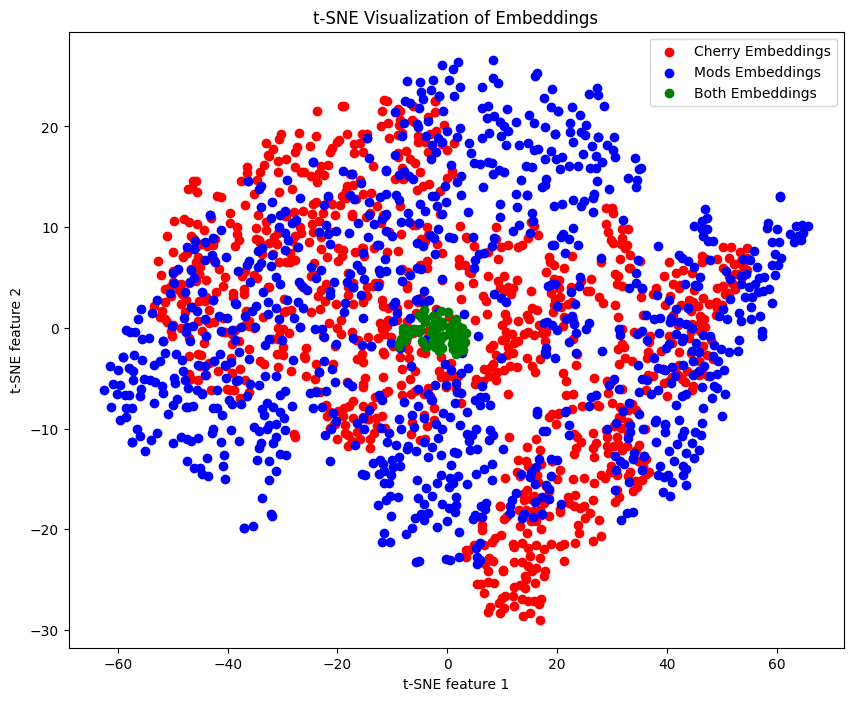

In [68]:
# ÊâßË°å t-SNE
tsne = TSNE(n_components=2, random_state=0)
cherry_tsne = tsne.fit_transform(cherry_embeddings)
mods_tsne = tsne.fit_transform(mods_embeddings)
both_tsne = tsne.fit_transform(both_embeddings)

# ÁªòÂà∂ t-SNE Âõæ
plt.figure(figsize=(10, 8))

# ÁªòÂà∂ cherry_embeddings
plt.scatter(cherry_tsne[:, 0], cherry_tsne[:, 1], c='red', label='Cherry Embeddings')

# ÁªòÂà∂ mods_embeddings
plt.scatter(mods_tsne[:, 0], mods_tsne[:, 1], c='blue', label='Mods Embeddings')

# ÁªòÂà∂ both_embeddings
plt.scatter(both_tsne[:, 0], both_tsne[:, 1], c='green', label='Both Embeddings')

# Ê∑ªÂä†Âõæ‰æã
plt.legend()

# Ê∑ªÂä†Ê†áÈ¢òÂíåÂùêÊ†áËΩ¥Ê†áÁ≠æ
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

# gpt4ÊâìÂàÜ

In [6]:
from transformers import AutoModelForCausalLM, LlamaForCausalLM, AutoTokenizer
from peft import PeftModel
import torch
base_model = AutoModelForCausalLM.from_pretrained("/mnt/bn/data-tns-live-llm/leon/datasets/cherry-math/")
cherry_model = PeftModel.from_pretrained(base_model, "/mnt/bn/data-tns-live-llm/leon/datasets/cherry-math/", device_map="auto", torch_dtype=torch.float16)
cherry_tokenizer = AutoTokenizer.from_pretrained("/mnt/bn/data-tns-live-llm/leon/datasets/Llama-2-7b-hf", use_fast=False)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

ValueError: Can't find 'adapter_config.json' at '/mnt/bn/data-tns-live-llm/leon/datasets/cherry-math/'

In [16]:
from transformers import AutoModelForCausalLM, LlamaForCausalLM, AutoTokenizer
from unsloth import FastLanguageModel 
base_model = FastLanguageModel.from_pretrained("/mnt/bn/data-tns-live-llm/leon/datasets/cherry-math/")
print(base_model)

Unsloth unsuccessfully patched LoraLayer.update_layer. Please file a bug report.
Luckily, your training run will still work in the meantime!


ü¶• Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth: Fast Llama patching release 2024.5
   \\   /|    GPU: Tesla V100-SXM2-32GB. Max memory: 31.749 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.1.1+cu121. CUDA = 7.0. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. Xformers = 0.0.22.post7. FA = False.
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


Unsloth 2024.5 patched 32 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


(PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaSdpaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=32, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=32, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear4bit(
                (base_layer): Linear

In [4]:
print(cherry_model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaSdpaAttention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=32, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=32, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
      

In [10]:
from datasets import load_dataset
import polars as pl
data = pl.read_parquet("/mnt/bn/data-tns-live-llm/leon/datasets/gsm8k/main/test-00000-of-00001.parquet").to_dicts()
print(data[0].keys())

dict_keys(['question', 'answer'])


In [12]:
print(len(data))

1319


In [13]:
with open("/mnt/bn/data-tns-live-llm/leon/datasets/gsm8k/main/test.jsonl", "w") as f:
    for d in data:
        f.write(json.dumps(d, ensure_ascii=False) + '\n')